#### Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

pd.set_option('display.max_columns',30)

#### Importing Dataset

In [2]:
data = pd.read_csv(r"F:\Analytix Lab\Kaggle_Project\Credit card fraud prediction\Credit Card Defaulter Prediction.csv") 
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [3]:
#### Making a copy of dataset

data_copy = data.copy()

In [4]:
data_copy.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [6]:
data.select_dtypes('object').columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'default '], dtype='object')

In [7]:
def count_plot(x):
    ax = sns.countplot(x=x, data=data)
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()


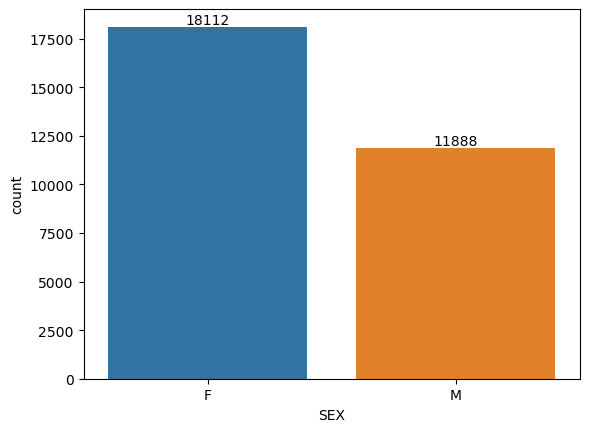

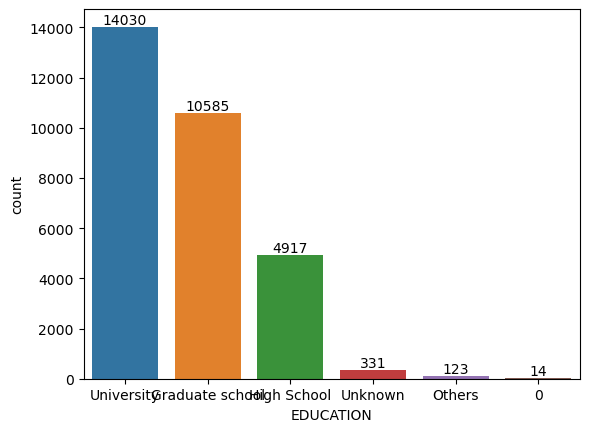

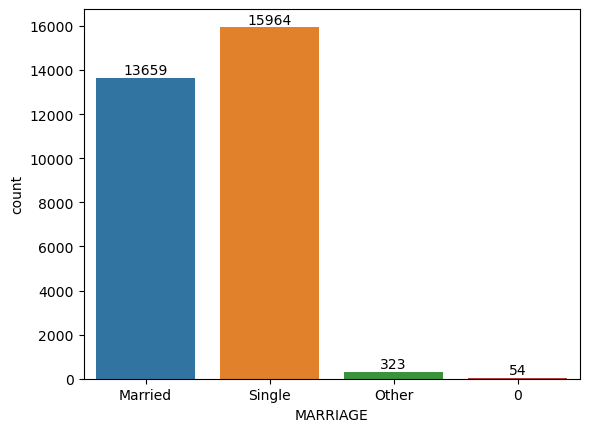

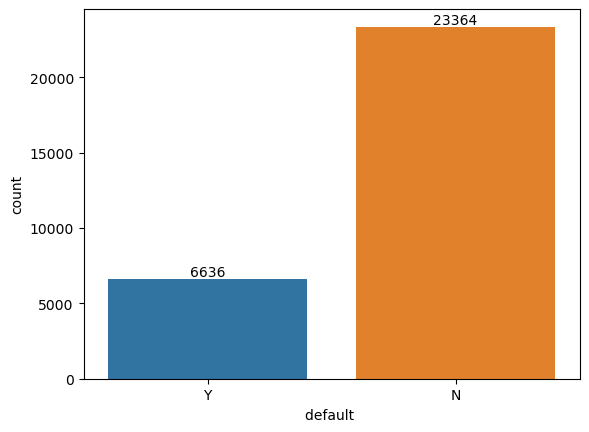

SEX          None
EDUCATION    None
MARRIAGE     None
default      None
dtype: object

In [8]:
data.select_dtypes('object').apply(count_plot)

* **We can see from above graphs that there are some 0 values inside Education and Marriage variable and following actions we will take for further analysis:**
* **1. In education variable, we will replace 0 with Unknown**
* **2. In Marriage variable, we will replace 0 with Other**

In [9]:
data.EDUCATION = np.where(data.EDUCATION == '0', 'Unknown', data.EDUCATION)
data.EDUCATION.value_counts()

University         14030
Graduate school    10585
High School         4917
Unknown              345
Others               123
Name: EDUCATION, dtype: int64

In [10]:
data.MARRIAGE = np.where(data.MARRIAGE == '0', 'Other', data.MARRIAGE)
data.MARRIAGE.value_counts()

Single     15964
Married    13659
Other        377
Name: MARRIAGE, dtype: int64

#### Replacing default variable with Yes record as 1 and No record as 0

In [11]:
## Removing extra space in column name
data.rename(columns={'default ':'default'}, inplace=True)
data.default = np.where(data.default == 'Y',1,0)
data.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

#### Checking Multicolinearity

In [12]:
data.corr()[data.corr()>0.75]

C:\Users\dell\AppData\Local\Temp\ipykernel_2012\3997361651.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()[data.corr()>0.75]


,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LIMIT_BAL,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_2,NaN,NaN,NaN,NaN,1.000000,0.766552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_3,NaN,NaN,NaN,NaN,0.766552,1.000000,0.777359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_4,NaN,NaN,NaN,NaN,NaN,0.777359,1.000000,0.819835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_5,NaN,NaN,NaN,NaN,NaN,NaN,0.819835,1.000000,0.8169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.816900,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BILL_AMT1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\dell\AppData\Local\Temp\ipykernel_2012\34522198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot:>

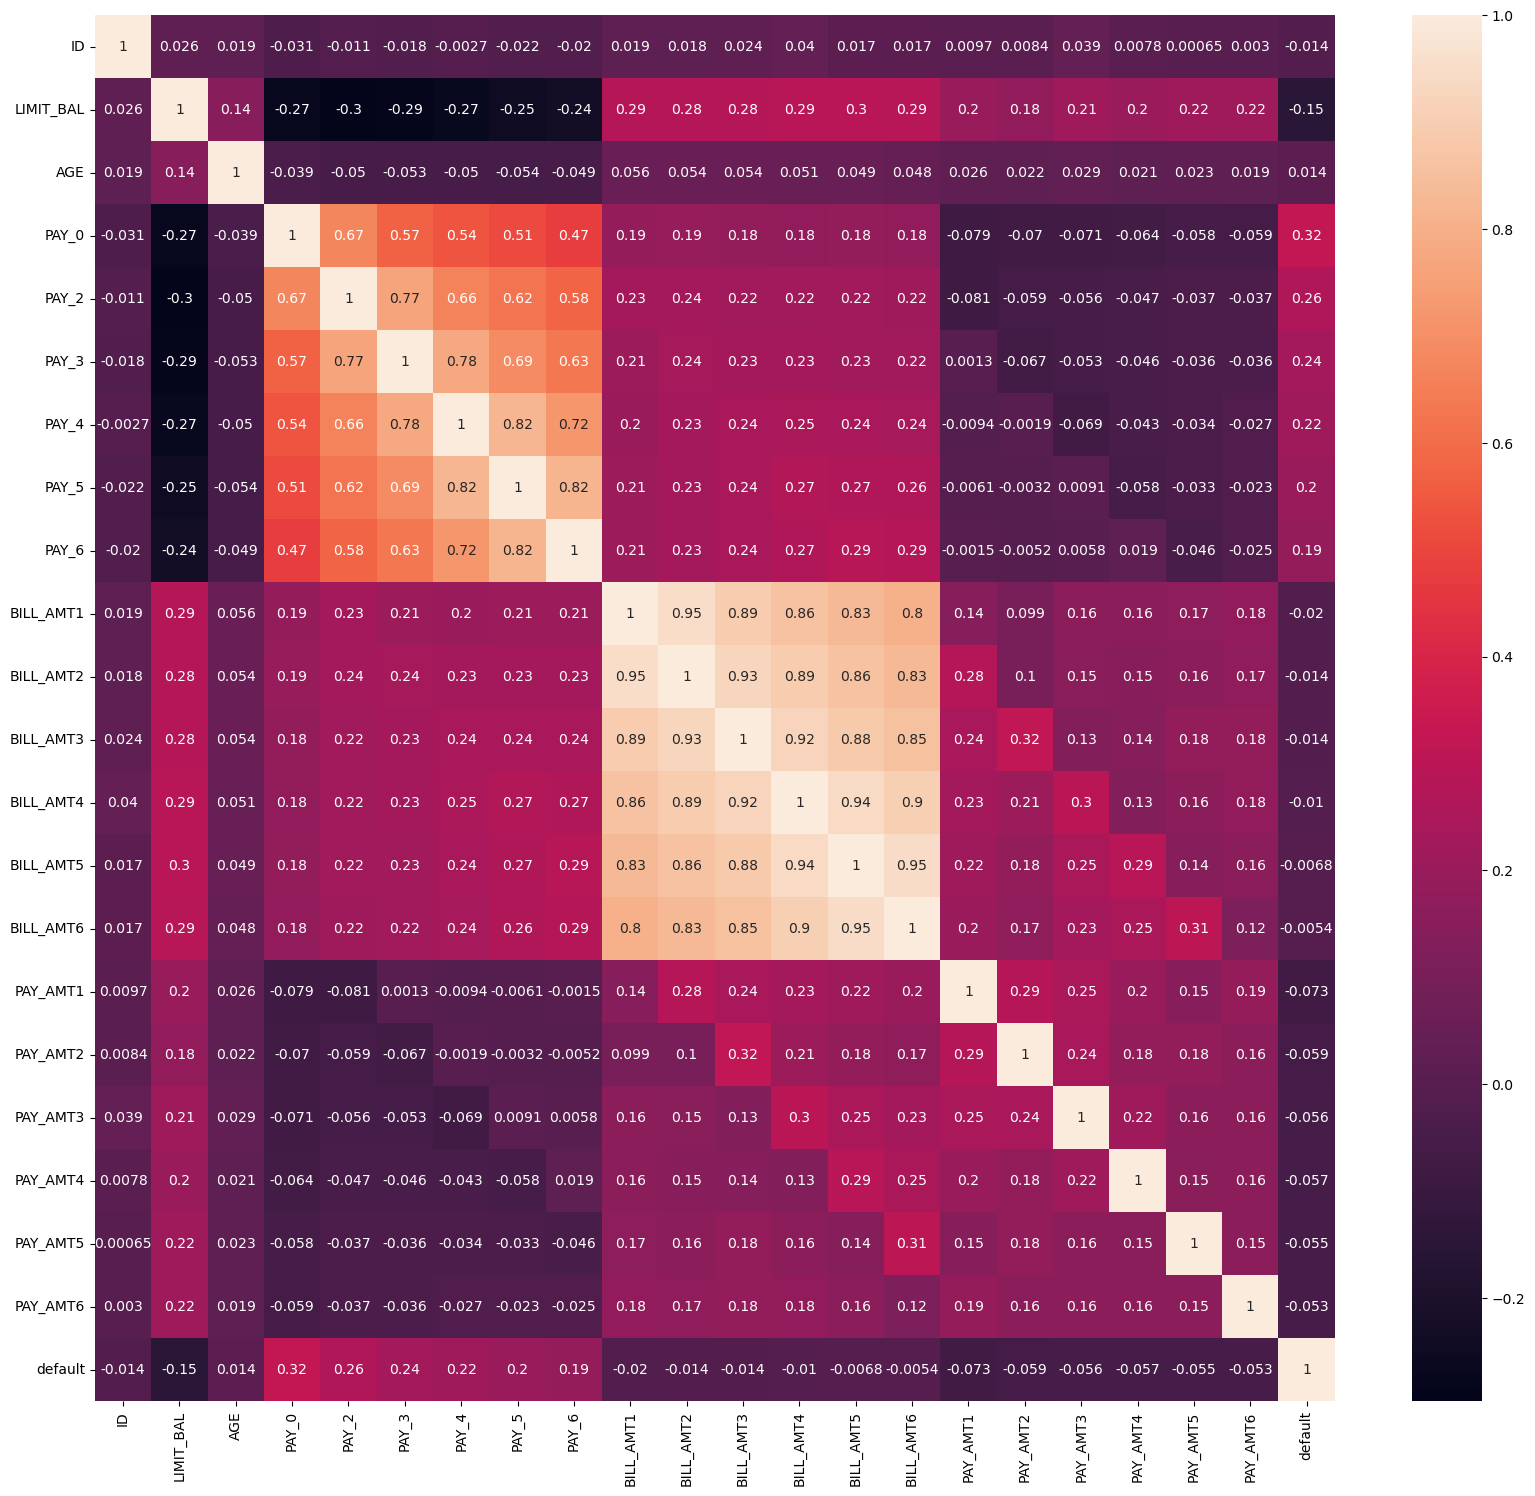

In [13]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), annot=True)

In [14]:
def hist_plt(x):
    sns.displot(x = x, data = data)
    plt.show()

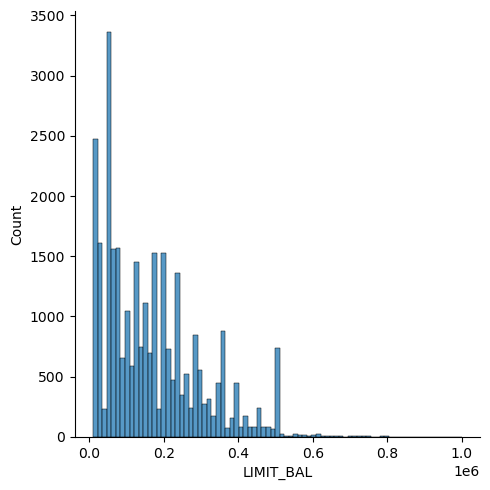

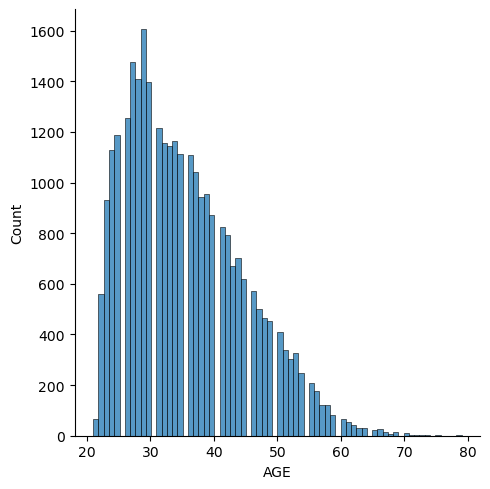

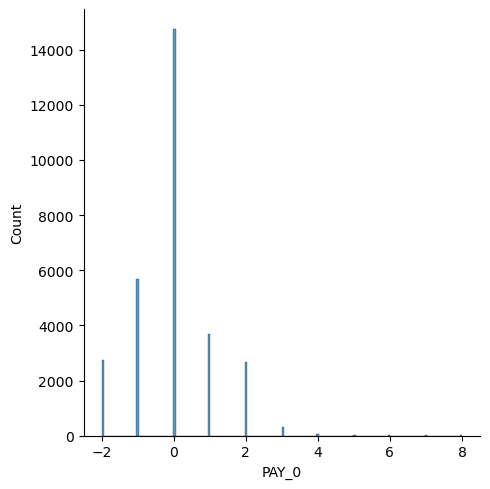

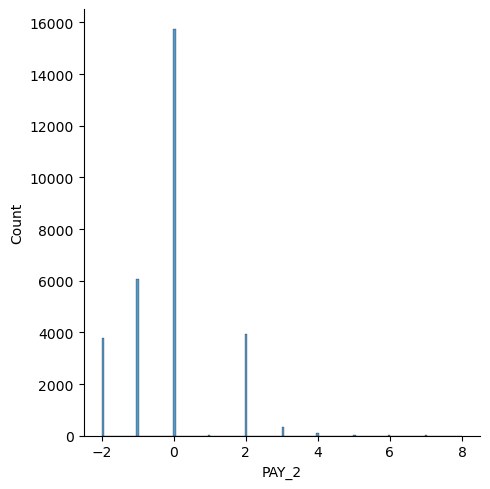

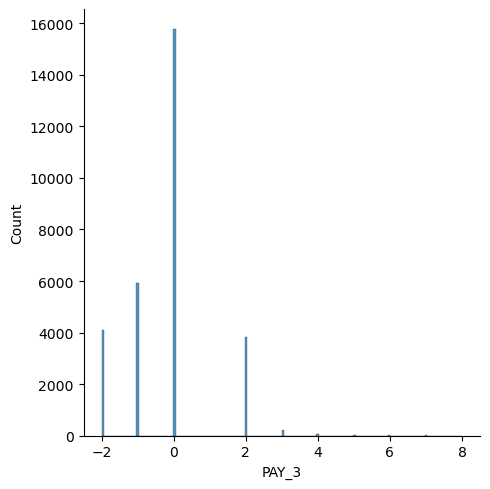

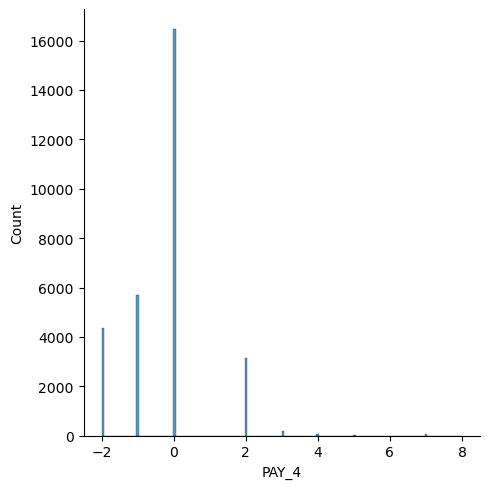

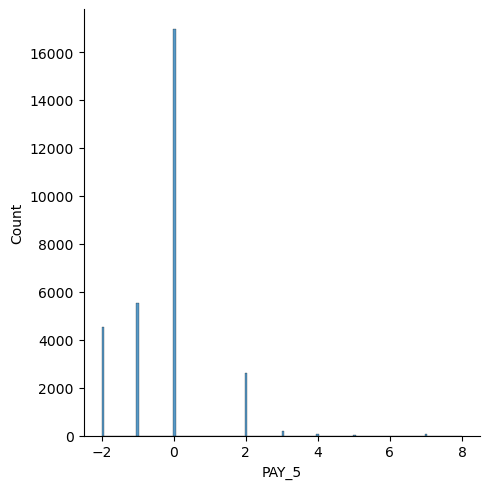

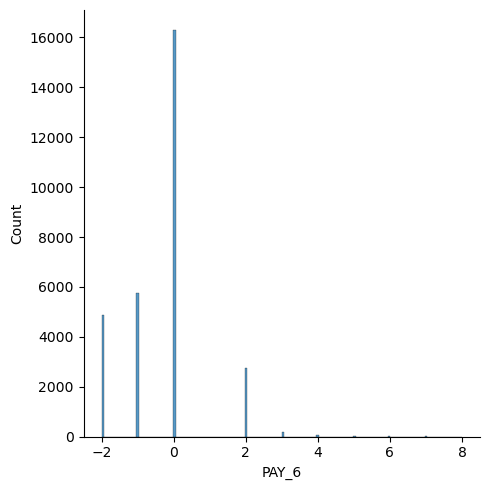

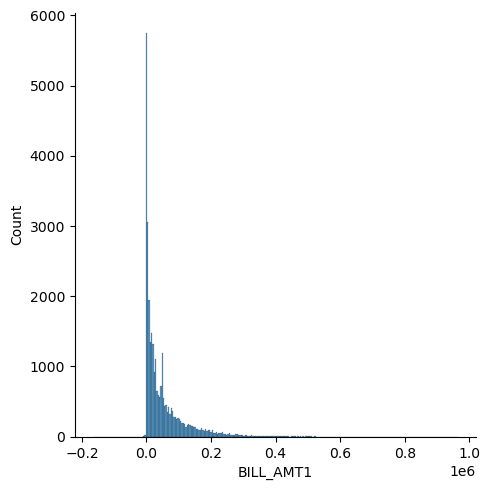

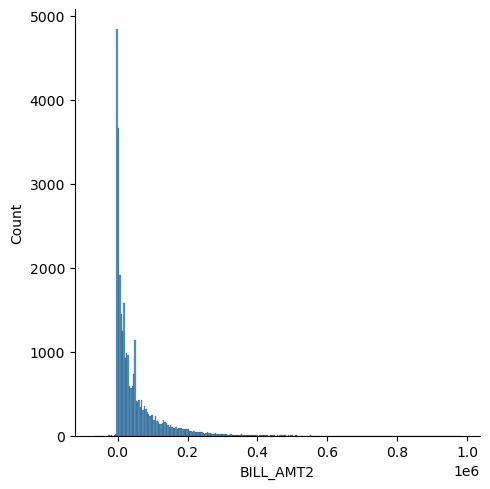

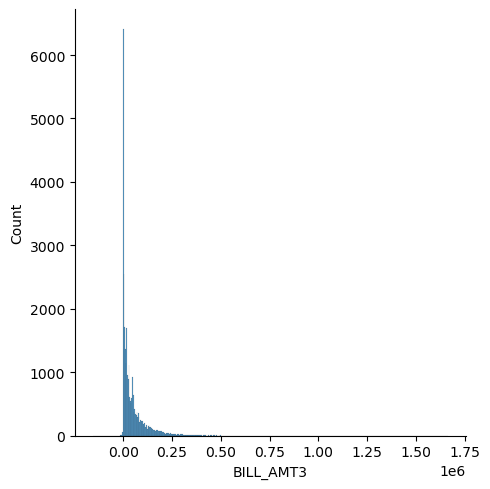

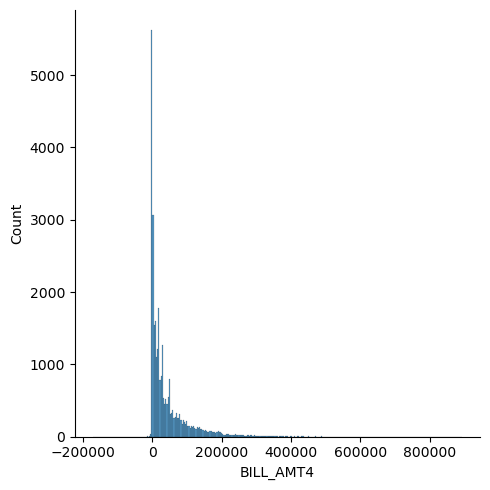

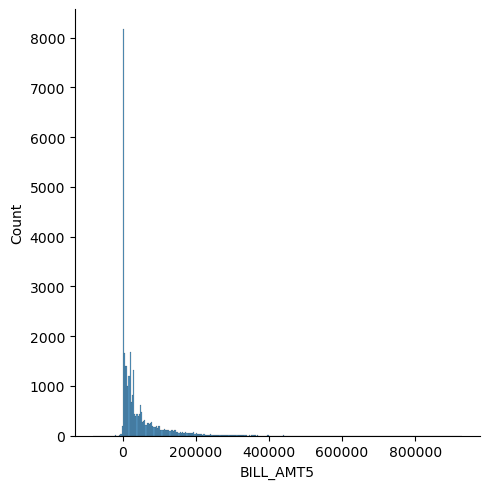

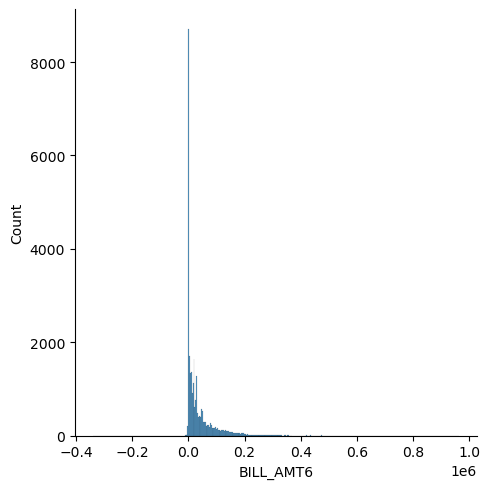

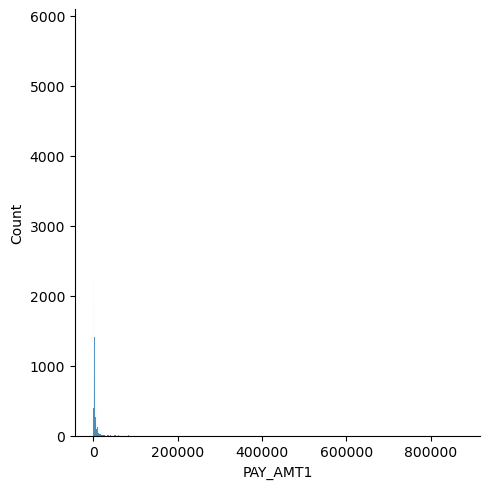

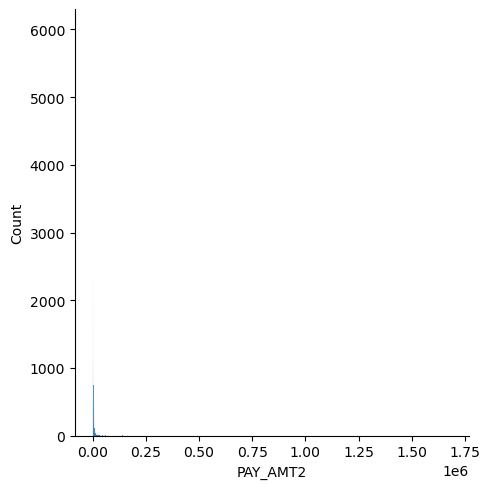

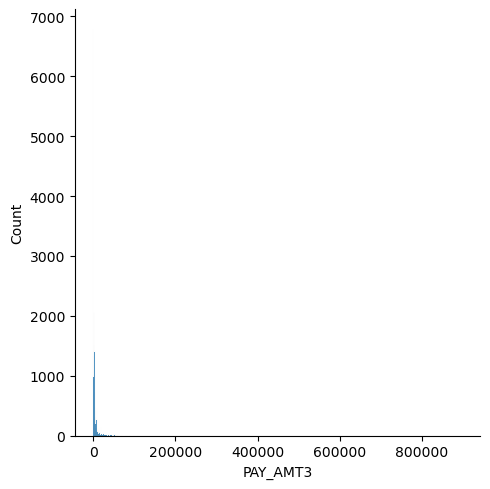

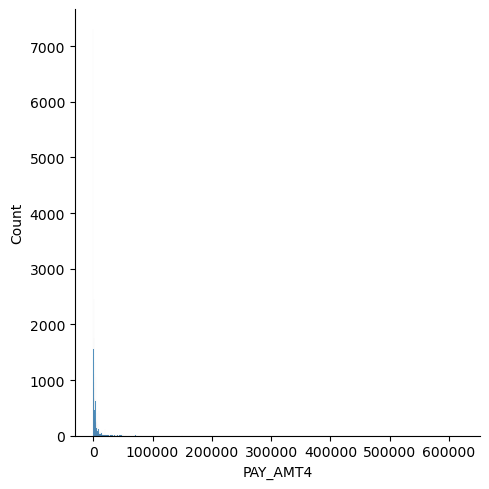

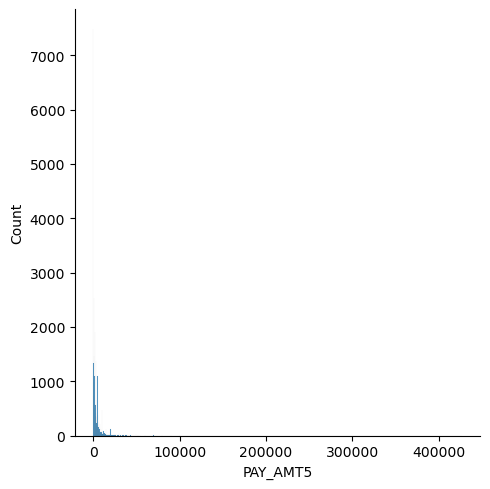

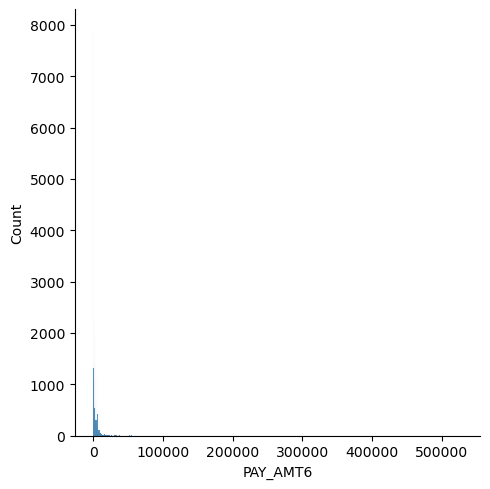

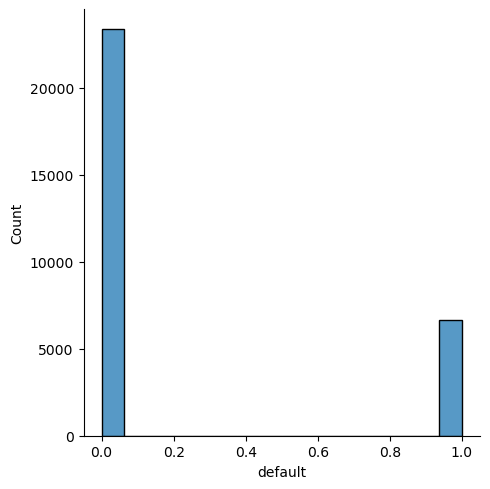

LIMIT_BAL    None
AGE          None
PAY_0        None
PAY_2        None
PAY_3        None
PAY_4        None
PAY_5        None
PAY_6        None
BILL_AMT1    None
BILL_AMT2    None
BILL_AMT3    None
BILL_AMT4    None
BILL_AMT5    None
BILL_AMT6    None
PAY_AMT1     None
PAY_AMT2     None
PAY_AMT3     None
PAY_AMT4     None
PAY_AMT5     None
PAY_AMT6     None
default      None
dtype: object

In [15]:
data.select_dtypes('number').drop(columns=['ID']).apply(hist_plt)

In [16]:
def skew(x):
    return x.skew()

In [17]:
data.select_dtypes('number').apply(skew)

ID            0.000000
LIMIT_BAL     0.992867
AGE           0.732246
PAY_0         0.731975
PAY_2         0.790565
PAY_3         0.840682
PAY_4         0.999629
PAY_5         1.008197
PAY_6         0.948029
BILL_AMT1     2.663861
BILL_AMT2     2.705221
BILL_AMT3     3.087830
BILL_AMT4     2.821965
BILL_AMT5     2.876380
BILL_AMT6     2.846645
PAY_AMT1     14.668364
PAY_AMT2     30.453817
PAY_AMT3     17.216635
PAY_AMT4     12.904985
PAY_AMT5     11.127417
PAY_AMT6     10.640727
default       1.343504
dtype: float64

In [18]:
## Checking 5 point summary of dataset

data.drop(columns='ID').describe([0.01,0.05,0.1,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,50%,90%,95%,99%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,10000.00,20000.0,30000.0,140000.0,360000.0,430000.00,500000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,22.00,23.0,25.0,34.0,49.0,53.00,60.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-2.00,-2.0,-1.0,0.0,2.0,2.00,3.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-2.00,-2.0,-2.0,0.0,2.0,2.00,3.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-2.00,-2.0,-2.0,0.0,2.0,2.00,3.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-2.00,-2.0,-2.0,0.0,2.0,2.00,3.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-2.00,-2.0,-2.0,0.0,0.0,2.00,3.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-2.00,-2.0,-2.0,0.0,2.0,2.00,3.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,-81.00,0.0,278.9,22381.5,142133.7,201203.05,350110.68,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,-200.00,0.0,0.0,21200.0,136905.5,194792.20,337495.28,983931.0


#### Treating Outlier with percentile method

In [19]:
def treat_outlier(x):
    if x.dtype != 'O':
        x = x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    return x

In [20]:
data = data.drop(columns='ID').apply(treat_outlier)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.00,689.0,0,0.0,0.0,0.0,1
1,120000,F,University,Single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.00,1000.0,1000,1000.0,0.0,2000.0,1
2,90000,F,University,Single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.00,1500.0,1000,1000.0,1000.0,5000.0,0
3,50000,F,University,Married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.00,2019.0,1200,1100.0,1069.0,1000.0,0
4,50000,M,University,Married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.00,36681.0,10000,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,M,High School,Married,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.00,20000.0,5003,3047.0,5000.0,1000.0,0
29996,150000,M,High School,Single,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.00,3526.0,8998,129.0,0.0,0.0,0
29997,30000,M,University,Single,37,3,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.00,0.0,22000,4200.0,2000.0,3100.0,1
29998,80000,M,High School,Married,41,1,-1,0,0,0,-1,-81.0,78379.0,76304.0,52774.0,11855.0,48944.0,66522.18,3409.0,1178,1926.0,52964.0,1804.0,1


In [21]:
data.insert(0, column= 'ID', value=data_copy.ID)

In [22]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.00,689.0,0,0.0,0.0,0.0,1
1,2,120000,F,University,Single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.00,1000.0,1000,1000.0,0.0,2000.0,1
2,3,90000,F,University,Single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.00,1500.0,1000,1000.0,1000.0,5000.0,0
3,4,50000,F,University,Married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.00,2019.0,1200,1100.0,1069.0,1000.0,0
4,5,50000,M,University,Married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.00,36681.0,10000,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.00,20000.0,5003,3047.0,5000.0,1000.0,0
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.00,3526.0,8998,129.0,0.0,0.0,0
29997,29998,30000,M,University,Single,37,3,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.00,0.0,22000,4200.0,2000.0,3100.0,1
29998,29999,80000,M,High School,Married,41,1,-1,0,0,0,-1,-81.0,78379.0,76304.0,52774.0,11855.0,48944.0,66522.18,3409.0,1178,1926.0,52964.0,1804.0,1


#### Separating cat and num variables

In [23]:
data_cat = data.select_dtypes('O').columns
data_cat

Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')

In [24]:
data_num = data.drop(columns=['ID', 'default']).select_dtypes('number').columns
data_num

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [25]:
scaler = StandardScaler()
scaler.fit(data[data_num])

StandardScaler()

In [26]:
data_num_treated = pd.DataFrame(scaler.transform(data[data_num]), columns= data_num)
data_num_treated

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.150697,-1.259302,1.870137,1.840805,-0.711960,-0.687849,-1.594334,-1.540160,-0.671110,-0.677801,-0.706830,-0.707937,-0.699508,-0.689440,-0.533317,-0.425445,-0.476506,-0.457969,-0.463429,-0.412518
1,-0.366890,-1.039282,-0.898477,1.840805,0.152629,0.209970,0.257856,2.087943,-0.688872,-0.698414,-0.675859,-0.653448,-0.638449,-0.630586,-0.533317,-0.395372,-0.371905,-0.350121,-0.463429,-0.231346
2,-0.602032,-0.159203,0.024395,0.122648,0.152629,0.209970,0.257856,0.273892,-0.305674,-0.514258,-0.506833,-0.469279,-0.435336,-0.408815,-0.372354,-0.347023,-0.371905,-0.350121,-0.353091,0.040411
3,-0.915555,0.170827,0.024395,0.122648,0.152629,0.209970,0.257856,0.273892,-0.049540,-0.002207,0.048434,-0.236416,-0.187723,-0.156182,-0.321244,-0.296836,-0.350984,-0.339336,-0.345478,-0.321932
4,-0.915555,2.371025,-0.898477,0.122648,-0.711960,0.209970,0.257856,0.273892,-0.603235,-0.639359,-0.160669,-0.359217,-0.361146,-0.344168,-0.321244,3.054918,0.569507,0.512659,-0.387406,-0.351010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.416918,0.390847,0.024395,0.122648,0.152629,0.209970,0.257856,0.273892,1.998812,2.162129,2.520406,0.757620,-0.147465,-0.401036,0.367993,1.441895,0.046815,-0.129357,0.088257,-0.321932
29996,-0.131748,0.830887,-0.898477,-0.736431,-0.711960,-0.687849,0.257856,0.273892,-0.703287,-0.696872,-0.663116,-0.558407,-0.607786,-0.689440,-0.338528,-0.151112,0.464697,-0.444056,-0.463429,-0.412518
29997,-1.072317,0.170827,2.793008,2.699883,1.881805,-0.687849,0.257856,0.273892,-0.676131,-0.673999,-0.674678,-0.360250,-0.335768,-0.340089,-0.533317,-0.492070,1.824723,-0.005009,-0.242754,-0.131702
29998,-0.680413,0.610867,0.947266,-0.736431,0.152629,0.209970,0.257856,-0.633134,-0.728740,0.449066,0.468209,0.170924,-0.489998,0.193891,6.520463,-0.162426,-0.353285,-0.250254,5.380470,-0.249101


In [27]:
data_num_treated.apply(skew)

LIMIT_BAL    0.890065
AGE          0.649240
PAY_0        0.329110
PAY_2        0.542669
PAY_3        0.514636
PAY_4        0.499901
PAY_5        0.481898
PAY_6        0.486031
BILL_AMT1    2.154584
BILL_AMT2    2.159753
BILL_AMT3    2.188063
BILL_AMT4    2.224446
BILL_AMT5    2.215094
BILL_AMT6    2.214609
PAY_AMT1     4.481036
PAY_AMT2     4.882634
PAY_AMT3     4.799828
PAY_AMT4     4.790998
PAY_AMT5     4.781006
PAY_AMT6     5.223211
dtype: float64

In [28]:
data_cat_treated = pd.get_dummies(data[data_cat], drop_first=True)
data_cat_treated

,SEX_M,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_Other,MARRIAGE_Single
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1
3,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...
29995,1,1,0,0,0,0,0
29996,1,1,0,0,0,0,1
29997,1,0,0,1,0,0,1
29998,1,1,0,0,0,0,0


In [29]:
data_final = pd.concat([data_num_treated, data_cat_treated], axis=1)
data_final['default'] = data['default']
data_final

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_M,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_Other,MARRIAGE_Single,default
0,-1.150697,-1.259302,1.870137,1.840805,-0.711960,-0.687849,-1.594334,-1.540160,-0.671110,-0.677801,-0.706830,-0.707937,-0.699508,-0.689440,-0.533317,-0.425445,-0.476506,-0.457969,-0.463429,-0.412518,0,0,0,1,0,0,0,1
1,-0.366890,-1.039282,-0.898477,1.840805,0.152629,0.209970,0.257856,2.087943,-0.688872,-0.698414,-0.675859,-0.653448,-0.638449,-0.630586,-0.533317,-0.395372,-0.371905,-0.350121,-0.463429,-0.231346,0,0,0,1,0,0,1,1
2,-0.602032,-0.159203,0.024395,0.122648,0.152629,0.209970,0.257856,0.273892,-0.305674,-0.514258,-0.506833,-0.469279,-0.435336,-0.408815,-0.372354,-0.347023,-0.371905,-0.350121,-0.353091,0.040411,0,0,0,1,0,0,1,0
3,-0.915555,0.170827,0.024395,0.122648,0.152629,0.209970,0.257856,0.273892,-0.049540,-0.002207,0.048434,-0.236416,-0.187723,-0.156182,-0.321244,-0.296836,-0.350984,-0.339336,-0.345478,-0.321932,0,0,0,1,0,0,0,0
4,-0.915555,2.371025,-0.898477,0.122648,-0.711960,0.209970,0.257856,0.273892,-0.603235,-0.639359,-0.160669,-0.359217,-0.361146,-0.344168,-0.321244,3.054918,0.569507,0.512659,-0.387406,-0.351010,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.416918,0.390847,0.024395,0.122648,0.152629,0.209970,0.257856,0.273892,1.998812,2.162129,2.520406,0.757620,-0.147465,-0.401036,0.367993,1.441895,0.046815,-0.129357,0.088257,-0.321932,1,1,0,0,0,0,0,0
29996,-0.131748,0.830887,-0.898477,-0.736431,-0.711960,-0.687849,0.257856,0.273892,-0.703287,-0.696872,-0.663116,-0.558407,-0.607786,-0.689440,-0.338528,-0.151112,0.464697,-0.444056,-0.463429,-0.412518,1,1,0,0,0,0,1,0
29997,-1.072317,0.170827,2.793008,2.699883,1.881805,-0.687849,0.257856,0.273892,-0.676131,-0.673999,-0.674678,-0.360250,-0.335768,-0.340089,-0.533317,-0.492070,1.824723,-0.005009,-0.242754,-0.131702,1,0,0,1,0,0,1,1
29998,-0.680413,0.610867,0.947266,-0.736431,0.152629,0.209970,0.257856,-0.633134,-0.728740,0.449066,0.468209,0.170924,-0.489998,0.193891,6.520463,-0.162426,-0.353285,-0.250254,5.380470,-0.249101,1,1,0,0,0,0,0,1


In [30]:
#### Separating X & y variables

X = data_final.drop(columns='default')
y = data_final['default']

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [33]:
model_0 = KNeighborsClassifier()
model_0.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_train_pred_0 = model_0.predict(X_train)
y_test_pred_0 = model_0.predict(X_test)

In [36]:
print("Train accuracy is: ", round(accuracy_score(y_train, y_train_pred_0),2))
print("Test accuracy is: ", round(accuracy_score(y_test, y_test_pred_0),2))

Train accuracy is:  0.84
Test accuracy is:  0.79


In [40]:
print(classification_report(y_train, y_train_pred_0))
print(classification_report(y_test, y_test_pred_0))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     16324
           1       0.72      0.48      0.57      4676

    accuracy                           0.84     21000
   macro avg       0.79      0.71      0.74     21000
weighted avg       0.83      0.84      0.83     21000

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      7040
           1       0.54      0.35      0.42      1960

    accuracy                           0.79      9000
   macro avg       0.69      0.63      0.65      9000
weighted avg       0.77      0.79      0.78      9000



#### Hyperparameter tuning

In [43]:
param = { 'n_neighbors': [3,4,5,6,7,8],
        'weights' : ['uniform', 'distance']
        }

In [44]:
grid_cv = GridSearchCV( estimator=KNeighborsClassifier(), param_grid=param, cv=5, scoring='accuracy'  )
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [45]:
grid_cv.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

In [46]:
grid_cv.best_score_

0.8074761904761905

In [47]:
model_1 = KNeighborsClassifier(n_neighbors=8, weights='uniform')
model_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [48]:
y_train_pred_1 = model_1.predict(X_train)
y_test_pred_1 = model_1.predict(X_test)

In [49]:
print("Train accuracy is: ", round(accuracy_score(y_train, y_train_pred_1),2))
print("Test accuracy is: ", round(accuracy_score(y_test, y_test_pred_1),2))

Train accuracy is:  0.83
Test accuracy is:  0.81


* ** In above model we get less difference between Train and test accuracy so this model is more Generalised**

In [50]:
print(classification_report(y_train, y_train_pred_1))
print(classification_report(y_test, y_test_pred_1))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     16324
           1       0.75      0.36      0.49      4676

    accuracy                           0.83     21000
   macro avg       0.80      0.66      0.69     21000
weighted avg       0.82      0.83      0.81     21000

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7040
           1       0.61      0.30      0.40      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.62      0.64      9000
weighted avg       0.78      0.81      0.78      9000

